# P1.1 Regression



Andrés Luna de la Garza #608994
<br><br>



<br><br>
En este proyecto se pretende analizar la relación entre la glucosa en sangre (Glucose) y otras variables clínicas y bioquímicas en un contexto de riesgo de cancer de mama. Para lograr esto, se tomó información en el UCI Machine Learning Repository en donde se encuentra información para 116 personas, con 10 variables predictoras en total. Esta base de datos se encuentra en el documento con el nombre “DATAr2.csv”.

La base de datos cuenta con la siguiente información:

•Age: Edad en años

•BMI: Índice de Masa Corporal (kg/m²)

•Glucose: Nivel de glucosa en sangre (mg/dL)

•Insulin: Nivel de insulina en sangre (μU/mL)

•HOMA: Índice de evaluación del modelo homeostático (medida de resistencia a la insulina)

•Leptin: Nivel de leptina en sangre (ng/mL)

•Adiponectin: Nivel de adiponectina en sangre (μg/mL)

•Resistin: Nivel de resistina en sangre (ng/mL)

•MCP.1: Proteína quimioatrayente de monocitos 1 (pg/mL

•Classification: Clasificación (1 = Saludable, 2 = Paciente con condición)

Este proyecto incluye los siguientes documentos:

<br><br>
1. Importa los datos a tu ambiente de trabajo. Describe características de tu base de datos,
imprimiendo en consola y graficando información relevante. Por ejemplo: cantidad de
observaciones, cantidad de variables, tipo de variables, nombre de variables,
identificación de la respuesta de interés, etc. Asegúrate de que tus variables tengan un
nombre fácilmente interpretable. En caso contrario, adjunta también un diccionario, un
archivo .docx, .xlsx, .pdf, .csv, etc. donde se describa cada variable (por ejemplo: var1.
Peso medido en gramos, var2. Diámetro medido en centímetros). Explica claramente qué
de esta información te permitió suponer que realizar una regresiónlineal pudiera ser una
buena solución y/o por qué supones que otro método sería una mejor opción.

In [70]:
import pandas as pd
data= pd.read_csv("DataR2.csv")
print(data.head())
print(" ")
print("El tamaño de la base de datos es de ", data.shape)
print(" ")
print("Los nombres de las variables son ", data.columns)
print(" ")
print("Los tipos de variables son: ", data.dtypes)
print(" ")
print("La respuesta de interes sería Classification(1=Saludable, 2=Paciente)")
print(" ")
print("Dicho esto, se considera que las variables presentadas en la base de datos permiten el análisis de regresión lineal debido a que son continuas y que tienen relaciones médicas lógicas en el mundo real. De la misma manera, la regresión lineal brindara apoyo para predecir dichos resultados.")
print("*NOTA: Se anexa el diccionario para comprender el signficado de las variables")

#En este paso primero se importó la librería pandas, luego se realizó la lectura del archivo y el almacenamiento la información en la variable data.
#Después con la función de data.shape se muestra el tamaño de la base de datos y data.columns el nombre de las variables y data.types el tipo d edatos. También se imprimen las primeras 5 filas de datos

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  
 
El tamaño de la base de datos es de  (116, 10)
 
Los nombres de las variables son  Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')
 
Los tipos de variables son:  Age                 int64
BMI               float64
Glucose             int64


<br><br>
2. Aplica soluciones para al menos tres de los cinco problemas típicos que se describieron
en la presentación C1.5. Demuestra las modificaciones que se le realizaron a la base de
datos, imprimiendo en consola información relevante, y explica por qué se realizaron. Por
ejemplo: para el caso de variables cualitativas, podrías imprimir la cantidad y los nombres
de las variables antes de aplicar la solución, y la cantidad y los nombres de las variables
después de aplicar la solución

Primero se detecta si existe algún tipo de outlier entre los datos proporcionados por la base de datos. Se verifica principalmente en las variables de Insulin, HOMA y MCP.1
Valores atípicos detectados: 5
    Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
71   44  24.740000      106   58.460  15.285341  18.1600    16.100000   
74   46  22.210000       86   36.940   7.836205  10.1600     9.760000   
78   86  26.666667      201   41.611  20.630734  47.6470     5.357135   
87   85  27.688778      196   51.814  25.050342  70.8824     7.901685   
90   40  30.836531      128   41.894  13.227332  31.0385     6.160995   

    Resistin     MCP.1  Classification  
71   5.31000   244.750               2  
74   5.68000   312.000               2  
78  24.37010  1698.440               2  
87  55.21530  1078.359               2  
90  17.55503   638.261               2  
Número de observaciones antes de eliminar outliers: 116
Número de observaciones después de eliminar outliers: 1

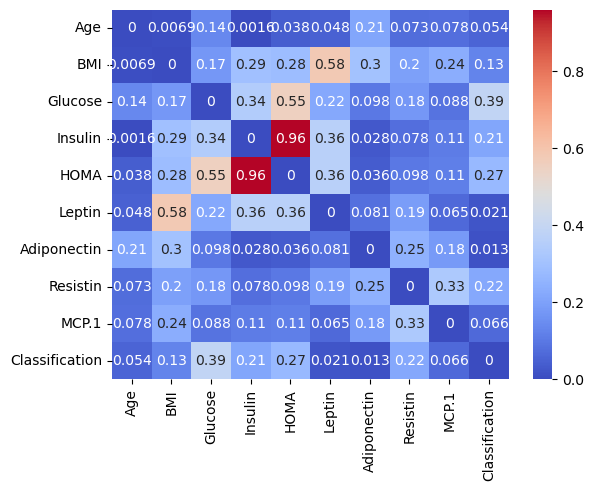

In [78]:
import seaborn as sns
import numpy as np
print("Primero se detecta si existe algún tipo de outlier entre los datos proporcionados por la base de datos. Se verifica principalmente en las variables de Insulin, HOMA y MCP.1")
#Procedimiento de OUTLIER para INSULIN
q1= data["Insulin"].quantile(0.25)
q3= data["Insulin"].quantile(0.75)
iqr= q3-q1
li= q1-(3*iqr)
ls=q3+(3*iqr)
outliers = np.where((data["Insulin"] <= li) | (data["Insulin"] >= ls))[0]
print("Valores atípicos detectados:", len(outliers))
print(data.iloc[outliers, :])
print("Número de observaciones antes de eliminar outliers:", data.shape[0])
data = data[(data["Insulin"] > li) & (data["Insulin"] < ls)]
print("Número de observaciones después de eliminar outliers:", data.shape[0])

#Procedimiento de OUTLIER para HOMA
q1= data["HOMA"].quantile(0.25)
q3= data["HOMA"].quantile(0.75)
iqr= q3-q1
li= q1-(3*iqr)
ls= q3+(3*iqr)
outliers_homa = np.where((data["HOMA"] <= li) | (data["HOMA"] >= ls))[0]
print("Valores atípicos detectados en HOMA:", len(outliers_homa))
print(data.iloc[outliers_homa, :])
print("Número de observaciones antes de eliminar outliers:", data.shape[0])
data_homa = data[(data["HOMA"] > li) & (data["HOMA"] < ls)]
print("Número de observaciones después de eliminar outliers:", data_homa.shape[0])
print("Tomando en cuenta en que la variable con mayor outliers es Insulin, en este se eliminaron aquellos a través del método Tukey. Estos datos fueron eliminados debido a que pudieron haber sido errores en la medición de insulina y pudieron haber afectado los coeficientes de la regresión lineal y modificar la relación entre variables.")
print(" ")
print(" ")

#Revisión de colinealidad
cor= data.corr().abs()
np.fill_diagonal(cor.values,0)
i,j=  np.unravel_index(cor.values.argmax(),cor.shape)
print("Indices con mayor correlación: ", cor.index[i], ",", cor.columns[j])
print("Valor con correlación máxima: ", cor.iloc[i,j])
import seaborn as sns
sns.heatmap(cor, annot=True, cmap="coolwarm")
print("Como se puede observar, las variables de Insulin y HOMA cuenta con alta colinealidad (0.96), por lo que se considera conveniente eliminar una de estas variables. Para este caso, se eliminará la variable HOMA al comparar el impacto entre ambas variables hacia la salida")
data= data.drop("HOMA", axis=1)
print(" ")
print(" ")

#Interacciones
print("Número de variables antes de interacciones:", data.shape[1])
# Crear una nueva variable de interacción (ejemplo: Glucose * BMI)
data["Glucose_BMI"]= data["Glucose"]*data["BMI"]
print("Número de variables después de interacciones:", data.shape[1])
print("Nuevas variables creadas: GlucosaxBMI")
print(data.head())

#En esta celda se aplican soluciones para tres problemas: outliers, colinealidad e interacciones
#Como se puede osbervar en el código, hay una divisióne entre el prcoedimiento de cada una de estas 
#Se realiza el metodo Tukey para los outliers, se revisa la colinealidad con un heatmap y se realizan las respectivas interacciones

<br><br>3. Realiza un proceso de selección de características. Puedes llevar a cabo una
metodología de selección hacia adelante o eliminación hacia atrás, o incluso mezclarlas.
También puedes utilizar un método de regularización. Evidencia tus resultados
imprimiendo en consola la cantidad y los nombres de las variables antes y después del
proceso de selección de características. Explica claramente por qué utilizaste la
metodología empleada, así como alguna conclusión sobre los resultados de este proceso.

<br><br>

In [79]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Definir X (predictores) y y (respuesta)
X = data.drop("Glucose", axis=1)
y = data["Glucose"]

# Separar en train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelo base (Lasso)
lasso = Lasso(alpha=0.01, max_iter=10000)

#Proceso de Eliminación Hacia Atrás
sfsb = SFS(lasso, k_features=(2, X.shape[1]//2), forward=False, floating=False, scoring='r2', cv=10)
sfsb = sfsb.fit(Xtrain, ytrain)
# Variables seleccionadas
print("Variables seleccionadas en backward:", sfsb.k_feature_names_)
seleccionadosbackward = [Xtrain.columns[i] for i in sfsb.k_feature_idx_]
# Ajustar modelo final con las seleccionadas
lasso.fit(Xtrain[seleccionadosbackward], ytrain)
ypredbackward = lasso.predict(Xtest[seleccionadosbackward])
# Calcular R² en test
r2b = r2_score(ytest, ypredbackward)
print("R^2 del modelo en backward:", r2b)

print("Cantidad de variables antes de la selección:", Xtrain.shape[1])
print("Variables originales:", list(Xtrain.columns))
# 2. Cantidad y nombres de variables después de la selección
print("Cantidad de variables después de la selección:", len(seleccionadosbackward))
print("Variables seleccionadas:", seleccionadosbackward)
print(" ")
print("Se tomó la decisión de implementar la selección hacia atrás ya que elimina las variables que menos aportan al modelo en base a la R^2. Con esto, reduzco la cantidad de variables de 9 a 3 y me quedo con las que tienen mayor relevancia para el modelo")
print("Como observación, aunque previamente se eliminó HOMA pensando que Insulin tenía mayor relevancia, el proceso mostró que las variables más predictivas son BMI, Insulin y Glucose_BMI., por lo que mantener Insulin fue una decisión correcta.")

#Para esto celda, se importan las librerías a utilizar
#Después se definen "x" y "y"
#luego se hace el procedimiento train y test para las variables y se genera un modelo Lasso
#También, se hace el proceso de eliminación hacia atras debido a su impacto en las variables
#Por último, se resalta la cantidad previa y actual de las variables y se justifica de la metodología

Variables seleccionadas en backward: ('BMI', 'Insulin', 'Glucose_BMI')
R^2 del modelo en backward: 0.9906602989837593
Cantidad de variables antes de la selección: 9
Variables originales: ['Age', 'BMI', 'Insulin', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification', 'Glucose_BMI']
Cantidad de variables después de la selección: 3
Variables seleccionadas: ['BMI', 'Insulin', 'Glucose_BMI']
 
Se tomó la decisión de implementar la selección hacia atrás ya que elimina las variables que menos aportan al modelo en base a la R^2. Con esto, reduzco la cantidad de variables de 9 a 3 y me quedo con las que tienen mayor relevancia para el modelo
Como observación, aunque previamente se eliminó HOMA pensando que Insulin tenía mayor relevancia, el proceso mostró que las variables más predictivas son BMI, Insulin y Glucose_BMI., por lo que mantener Insulin fue una decisión correcta.


<br><br>4.Genera un modelo de regresión lineal y al menos uno no lineal, para predecir una variable
de interés; explica con detalle por qué seguiste los pasos mostrados en tu código para
generar el modelo, en aras de obtener la mejor predicción y resultados generalizables.
Imprime en consola los coeficientes estimados al entrenar el modelo, e indica para cuáles
de ellos puedes afirmar que existe una asociación significativa con la respuesta, y el por
qué de tu aseveración.
<br><br>

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Usar solo las variables seleccionadas por backward
Xtrain_sel = Xtrain[seleccionadosbackward]
Xtest_sel = Xtest[seleccionadosbackward]

#("Procedimiento Usando un Modelo Lineal")
lin_model = LinearRegression()
lin_model.fit(Xtrain_sel, ytrain)
ypred_lin = lin_model.predict(Xtest_sel)
r2_lin = r2_score(ytest, ypred_lin)

print("Resultados del Modelo Lineal")
print("Coeficientes:", lin_model.coef_)
print("Intercepto:", lin_model.intercept_)
print("R^2 del modelo lineal:", r2_lin)
print(" ")
print(" ")
#("Procedimiento Usando KNN")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(Xtrain_sel, ytrain)
ypred_knn = knn_model.predict(Xtest_sel)
r2_knn = r2_score(ytest, ypred_knn)

print("Resultado de KNN")
print("R^2", r2_knn)
print(" ")
print(" ")
print("Analizando los coeficientes obtenidos del modelo entrenado, se identifica que el de BMI tiene mayor asociación significativa con la respuesta (Glucose). Esto se debe a que tiene mayor magnitud comparado con los demás coeficientes y su signo negativo indica que, manteniendo las otras variables constantes, a mayor BMI, la Glucose predicha disminuye.”")

#Aquí primero se importan funciones de liberarías previamente vistas
#De las variables seleccioandas de backwards, se realiza el procedimiento de un modelo lineal y se imprimen los coeficientes, el intercepto y el R^2 del modelo
#También, se realiza el mismo procedimiento para un modelo no lineal (que en este caso es un KNN)

Resultados del Modelo Lineal
Coeficientes: [-3.14871633  0.08947875  0.03276472]
Intercepto: 94.87068999619378
R^2 del modelo lineal: 0.9906599803848936
 
 
Resultado de KNN
R^2 0.5360245082231537
 
 
Analizando los coeficientes obtenidos del modelo entrenado, se identifica que el de BMI tiene mayor asociación significativa con la respuesta (Glucose). Esto se debe a que tiene mayor magnitud comparado con los demás coeficientes y su signo negativo indica que, manteniendo las otras variables constantes, a mayor BMI, la Glucose predicha disminuye.”


<br><br>5. Calcula al menos una métrica de error y una del nivel de linealidad del modelo, con la
intención de que ambas métricas representen el funcionamiento esperado del modelo
para cualquier dato que se le presente. Agrega un comentario que describa en palabras
sencillas el significado de los mismos.
<br><br>

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predicciones del modelo lineal
ypred_lin = lin_model.predict(Xtest_sel)

# Métrica de error: RMSE
rmse = np.sqrt(mean_squared_error(ytest, ypred_lin))

# Métrica de linealidad: R²
r2_lin = r2_score(ytest, ypred_lin)

print("Demostración de métricas")
print("RMSE:", rmse)
print("R^2:", r2_lin)
print(" ")
print("Se decidió calcular la métrica de RMSE ya que nos dice que tanto se desvían los valores que se predijeron de los valores reales.")
print("En cuanto al R^2, como ya se había calculado previamente, se tomó en consideración ya que indica la variabilidad de la variable Glucose demostrada en el modelo")

#Aquí se calcula la métrica de RMSE por su importancia al momento de analizar los datos del modelo

Demostración de métricas
RMSE: 2.3398980810227052
R^2: 0.9906599803848936
 
Se decidió calcular la métrica de RMSE ya que nos dice que tanto se desvían los valored que se predijeron de los valores reales.
En cuanto al R^2, como ya se había calculado previamente, se tomó en consideración ya que indica la variabilidad de la variable Glucose demostrada en el modelo


<br><br>6.Genera un modelo de regresión lineal o no lineal (del mismo tipo que el que haya obtenido
el mejor desempeño en los puntos anteriores), pero para realizar un análisis de inferencia.
A partir del mismo, realiza una o varias inferencias sobre los datos, asegurándote de
incluir márgenes de error para tus conclusiones.
<br><br>

In [77]:
import statsmodels.api as sm
print("Tomando en cuenta que se obtuvo un mejor desempeño en el modelo de regresión lineal, se realizará un análisis de inferencia en este mismo:")
print(" ")
# Agregar constante (intercepto)
Xtrain_sel_const = sm.add_constant(Xtrain_sel)

# Ajustar modelo lineal
model = sm.OLS(ytrain, Xtrain_sel_const).fit()

# Resumen completo del modelo
print(model.summary())
print("Verificación de p-value completo: ")
print(" ")
print(model.pvalues)
print(" ")
print("CONCLUSIONES:")
print("El modelo ajustado presenta un R^2 elevado de 0.97, lo que significa que explica el 97% de la variabilidad de Glucose.")
print("Las variables BMI, Insulin y Glucose_BMI muestran una asociación significativa con Glucose, ya que sus p-values son menores a 0.05.")
print(" ")
print("En promedio, y con un 95% de confianza:")
print("Por cada aumento de 1 unidad en BMI, el nivel de Glucose disminuye aproximadamente 3.15.")
print("Por cada aumento de 1 unidad en Insulin, el nivel de Glucose incrementa en 0.0895.")
print("Por cada aumento de 1 unidad en Glucose_BMI, el nivel de Glucose incrementa en 0.0328.")
#Por último, se genera un modelo de regersión lineal debido a que fue el que tuvo mejor desempeño
#Después se ajusta el modelo y se da el resumen completo
#Finalmente, se resaltan las características del modelo, como también la relación entre variables con la salida

Tomando en cuenta que se obtuvo un mejor desempeño en el modelo de regresión lineal, se realizará un análisis de inferencia en este mismo:
 
                            OLS Regression Results                            
Dep. Variable:                Glucose   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1210.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):           5.53e-69
Time:                        02:17:25   Log-Likelihood:                -202.93
No. Observations:                  88   AIC:                             413.9
Df Residuals:                      84   BIC:                             423.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025  

<br>Código de Honor: Yo, Andrés Luna de la Garza, doy mi palabra que he realizado esta actividad con integridad académica